## Plotting the recovery time of COVID-19 patients in the Philippines

This notebook will explore the average recovery time of COVID-19 cases in the country. Further, it aims to clean the data by aggregating or dropping relevant fields in the dataset. This should yield another csv file with additional columns that could add a deeper layer when visualizing with tools like Tableau.

Specifically, we want to answer:

1. What is the average recovery time for COVID-19 patients in the Philippines?
2. What is the average recovery time for males and females?
3. What is the average recovery time across all age groups?

## About the dataset

The DoH uploads a running list of COVID-19 related information daily in the form of data drops. Their case data file has information divided into several columns. For the purposes of this notebook, we'll focus only on the following:

* `CaseCode`: Unique code assigned to each case
* `DateRepConf`: Date publicly announced as a confirmed case
* `DateRecover`: Date the patient has recovered
* `AgeGroup`
* `Sex`

## Technical notes from the DoH about the dataset

According to the DoH:

* Data is extracted from the COVID-19 Information System by the DOH Epidemiology Bureau (EB) every 12 noon daily.
* Data is encoded from mostly paper case investigation forms (CIFs), therefore some encoding discrepancies may occur. 
* All case data are dynamically updated daily as more accurate information is triangulated from a variety of official sources.

In [1]:
# Necessary imports and Jupyter magic line

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading and initial cleaning of the dataset

In [2]:
# Reading the dataset and making another dataframe which contains only the columns we need

case_data = pd.read_csv('DOH COVID19 Case Data 12 May.csv')
case_data
recovered = case_data[['CaseCode', 'DateRepConf', 'DateRecover', 'Sex', 'AgeGroup']]

In [3]:
# Dropping rows which have null values in the DateRecover column

recovered = recovered.dropna(subset=['DateRecover'])

In [4]:
# Renaming the "5 to 9" values in AgeGroup column so they'll be in proper position when sorting later on

recovered.AgeGroup = recovered.AgeGroup.str.replace('5 to 9', '05 to 9')

### Getting the average recovery time of patients

In [5]:
# Converting the values of the DateRepConf and DateRecover columns to datetime

recovered['DateRepConf'] = pd.to_datetime(recovered['DateRepConf'])
recovered['DateRecover'] = pd.to_datetime(recovered['DateRecover'])

In [6]:
# Adding a new column to our dataframe: 'RecoveryTime' which contains how many days it took before a patient recovered

recovered['RecoveryTime'] = (recovered['DateRecover'] - recovered['DateRepConf']).dt.days
recovered = recovered[['CaseCode', 'Sex', 'AgeGroup', 'DateRepConf', 'DateRecover', 'RecoveryTime']]
recovered['RecoveryTime'].value_counts()

 10    58
 14    57
 19    52
 17    48
 15    47
 12    47
 8     47
 6     42
 18    42
 7     41
 11    40
 5     35
 13    34
 4     32
 16    29
 9     28
 3     28
 21    26
 20    26
 22    25
 2     24
 24    21
 23    21
 25    17
 1     16
 30    13
 27    12
 26    12
 28    12
-4     11
 0     11
 31    11
 29     8
-1      7
-5      7
-2      6
-3      6
 32     6
-8      5
 35     4
-6      4
 33     3
 37     3
-9      2
-10     2
-12     2
 41     2
 39     2
 36     2
 34     2
 46     1
 45     1
-7      1
 40     1
-13     1
 38     1
-11     1
-25     1
Name: RecoveryTime, dtype: int64

**Notice that there are negative numbers included in the column (likely a clerical error when dates for DateRepConf or DateRecover where plugged-in). We will proceed to remove those columns.**

In [7]:
recovered = recovered.drop(recovered[recovered.RecoveryTime < 0].index)
recovered

,CaseCode,Sex,AgeGroup,DateRepConf,DateRecover,RecoveryTime
4,C100660,Female,40 to 44,2020-04-02,2020-04-26,24
10,C101232,Male,30 to 34,2020-03-21,2020-04-20,30
21,C102036,Female,30 to 34,2020-03-25,2020-04-02,8
39,C103595,Male,40 to 44,2020-04-11,2020-04-19,8
50,C104241,Female,60 to 64,2020-03-29,2020-03-31,2
...,...,...,...,...,...,...
11289,C995945,Female,45 to 49,2020-04-01,2020-04-09,8
11303,C996917,Male,30 to 34,2020-03-22,2020-04-07,16
11306,C997107,Female,30 to 34,2020-04-25,2020-05-06,11
11322,C997776,Male,25 to 29,2020-04-03,2020-04-07,4


In [8]:
# Now that negative values are removed, we can calculate the average time it takes for patients to recover

rectime_avg = recovered['RecoveryTime'].mean()
rectime_avg

14.287878787878787

### What is the average recovery time for COVID-19 patients in the Philippines?

### Answer: 14.29 days

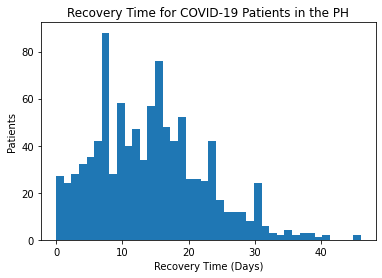

In [9]:
# Plotting the values from RecoverTime in a histogram

recovered.plot(kind='hist', y='RecoveryTime', title='Recovery Time for COVID-19 Patients in the PH', bins=(40), legend=False)

plt.xlabel('''Recovery Time (Days)''')
plt.ylabel('Patients')
plt.show()

### Getting the average recovery time for males and females

In [10]:
# Creating a pivot table which groups values by sex, and then getting the mean

pv_rectime_sex = recovered.pivot_table(['RecoveryTime'], 'Sex', aggfunc=np.mean, margins=True)
pv_rectime_sex

,RecoveryTime
Sex,
Female,14.244395
Male,14.323529
All,14.287879


### Getting the average recovery time for different age groups

In [11]:
# Creating a pivot table which groups values by age group, and then getting the mean

pv_rectime_age = recovered.pivot_table(['RecoveryTime'], 'AgeGroup', aggfunc=np.mean, margins=True)
pv_rectime_age

,RecoveryTime
AgeGroup,
0 to 4,10.333333
05 to 9,14.000000
10 to 14,12.000000
15 to 19,6.500000
20 to 24,15.960784
25 to 29,15.704545
30 to 34,15.512000
35 to 39,14.964706
40 to 44,13.217949


Text(0.5, 0, 'Average Number of Days')

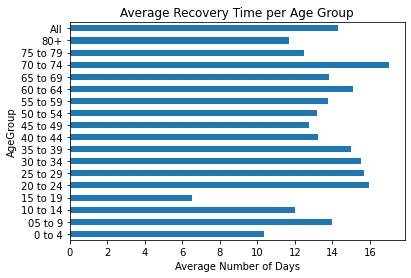

In [12]:
# plotting our pivot table into a horizontal bar graph

pv_rectime_age.plot(kind='barh', legend=False, title='Average Recovery Time per Age Group')
plt.xlabel('Average Number of Days')